In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

In [41]:
df = pd.read_csv('nyc_taxi.csv', index_col='timestamp')
df.index = pd.to_datetime(df.index)

In [42]:
df.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


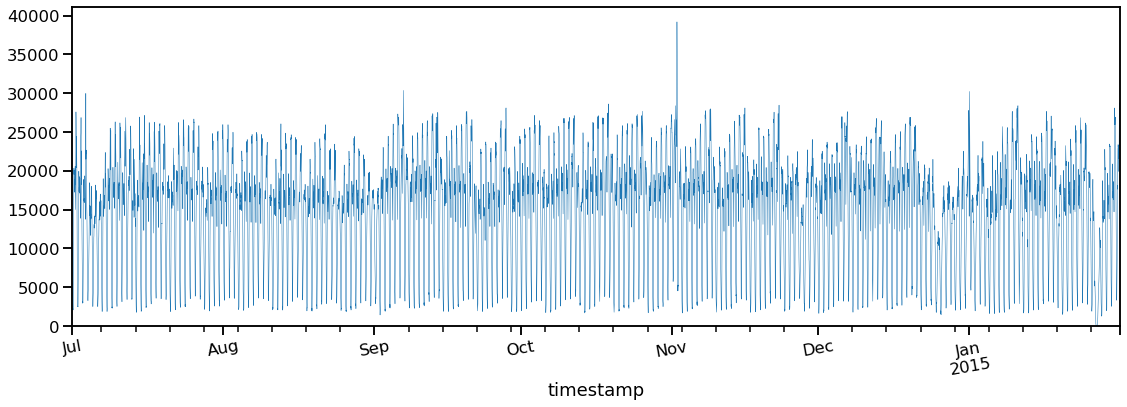

In [43]:
fig, ax = plt.subplots(figsize=(16,6))

df['value'].plot(lw=0.5, rot=10)

ax.set_ylim(bottom=0)
plt.tight_layout()
plt.show()

Uma semana de dados. Não plotes a primeira semana porque há o 4 de Julho e lá é feriado.

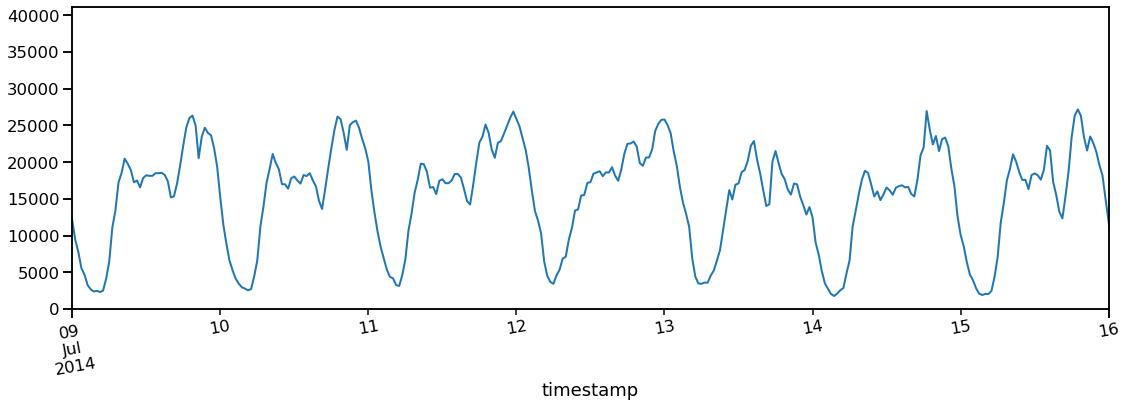

In [47]:
fig, ax = plt.subplots(figsize=(16,6))

df['value'].plot(lw=2, rot=10)

ax.set_ylim(bottom=0)
ax.set_xlim('2014-07-09', '2014-07-16')
plt.tight_layout()
plt.show()

In [71]:
len(rfftval)

5161

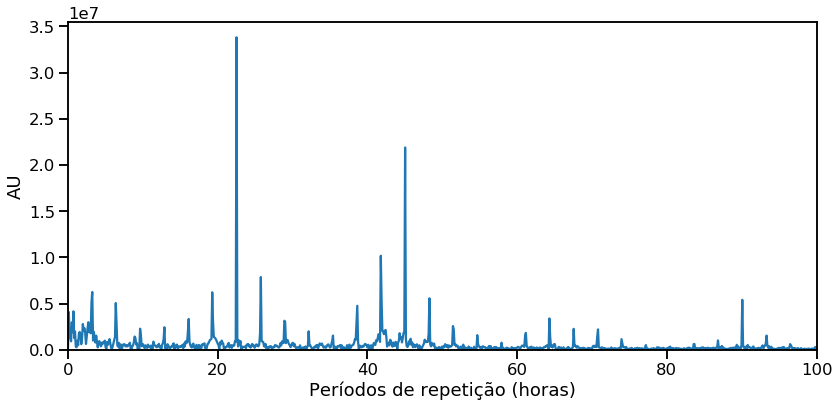

In [118]:
fig, ax = plt.subplots(figsize=(12,6))


rfftval = np.abs(np.fft.rfft(df.value.values-df.values.mean()))
x = np.linspace(0, len(rfftval), len(rfftval))/(60.0)*2.0*np.pi

ax.plot(x, rfftval)

ax.set_xlim(0, 100)
ax.set_ylim(bottom=0)

ax.set_ylabel("AU")
ax.set_xlabel("Períodos de repetição (horas)")

plt.tight_layout()
plt.show()

A frequência de sampling, em Hz, é o inverso da diferença de dois pontos consecutivos. Então fica o in verso de 30x60s = 1800s: 1/1800Hz

In [96]:
fs = 1.0/(30.0*60.0)
f, t, Sxx = spectrogram(df.value.values, nfft=1024, nperseg=512, fs=fs)

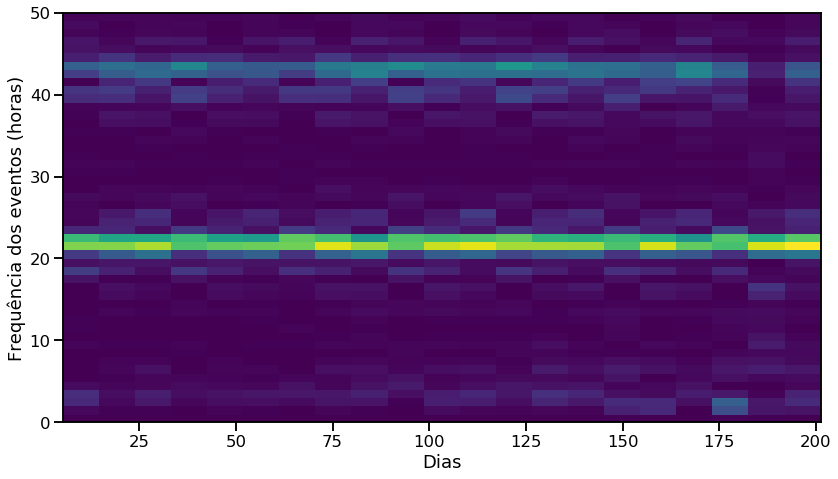

In [98]:
fig, ax = plt.subplots(figsize=(12,7))

#t em segundos, logo para converter para dias é dividir por 24*60*60
tdias = t/(24.0*60.0*60.0)

#A frequência está em "por segundo". Para converter para horas tens que multiplicar por 60.0*60.0
fh = f * 60.0*60.0 *len(f)

ax.pcolormesh(tdias, fh, Sxx)
ax.set_ylim(0, 50)

ax.set_xlabel("Dias")
ax.set_ylabel("Frequência dos eventos (horas)")

plt.tight_layout()
plt.show()

A trend dos ciclos aproximados de 24 horas é o termo dominante ao longo od período de análise.